<a href="https://colab.research.google.com/github/tanvijain13/KDM_2021/blob/main/ICP-12/ICP12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance yahoofinancials

     |████████████████████████████████| 5.5MB 17.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=7d555a0b41c4ce1ddabb0235cba6e356ebebd9ee5e3767db0c3c13b1c12675d2
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp37-none-any.whl size=15192 sha256=d83828f8f16860792cb2c545fefe7971070ae179d46e038f126ff13e2227c2e8
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yfinance yahoofinancials
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#importing libraries

import numpy as np
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

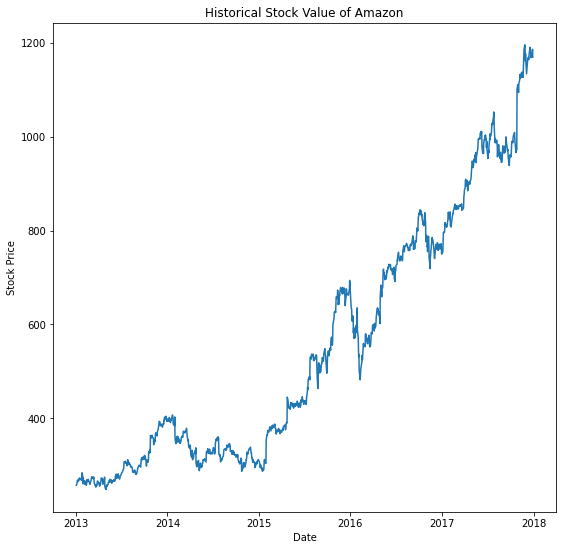

In [6]:
#Here set stock training start and end date

raw_data = yf.download('AMZN',
                      start='2013-1-1',
                      end='2017-12-31', 
                      progress=False)

#plotting
plt.figure(figsize=(9,9))
plt.plot(raw_data['Close'])
plt.title('Historical Stock Value of Amazon')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [7]:
#preprocessing
raw_data['Date'] = raw_data.index
req_data = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
req_data['Date'] = raw_data['Date']
req_data['Open'] = raw_data['Open']
req_data['High'] = raw_data['High']
req_data['Low'] = raw_data['Low']
req_data['Close'] = raw_data['Close']

In [8]:
train_set = req_data.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape


(1199, 60, 1)

In [9]:
#LSTM Recurrent Model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [10]:
#fitting the model
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 30, batch_size = 16)

Epoch 1/30
75/75 [==============================] - 21s 13ms/step - loss: 0.0907
Epoch 2/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0427
Epoch 3/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0188
Epoch 4/30
75/75 [==============================] - 1s 14ms/step - loss: 0.0059
Epoch 5/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0040
Epoch 6/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0039
Epoch 7/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0033
Epoch 8/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0036
Epoch 9/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0033
Epoch 10/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0036
Epoch 11/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0037
Epoch 12/30
75/75 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 13/30
75/75 [=================

In [11]:
#Fetching the test data and preprocessing
test_raw_data = yf.download('AMZN',
                      start='2018-1-1',
                      end='2019-1-1', 
                      progress=False)

test_raw_data['Date'] = test_raw_data.index
test_data = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
test_data['Date'] = test_raw_data['Date']
test_data['Open'] = test_raw_data['Open']
test_data['High'] = test_raw_data['High']
test_data['Low'] = test_raw_data['Low']
test_data['Close'] = test_raw_data['Close']
real_stock_price = test_data.iloc[:, 4:5].values
dataset_total = pd.concat((req_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = sc.transform(inputs.reshape(-1,1))
X_test = []
for i in range(60, 300):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test.shape


(240, 60, 1)

In [12]:
#predicting
prediction = model.predict(X_test)
prediction = sc.inverse_transform(prediction)


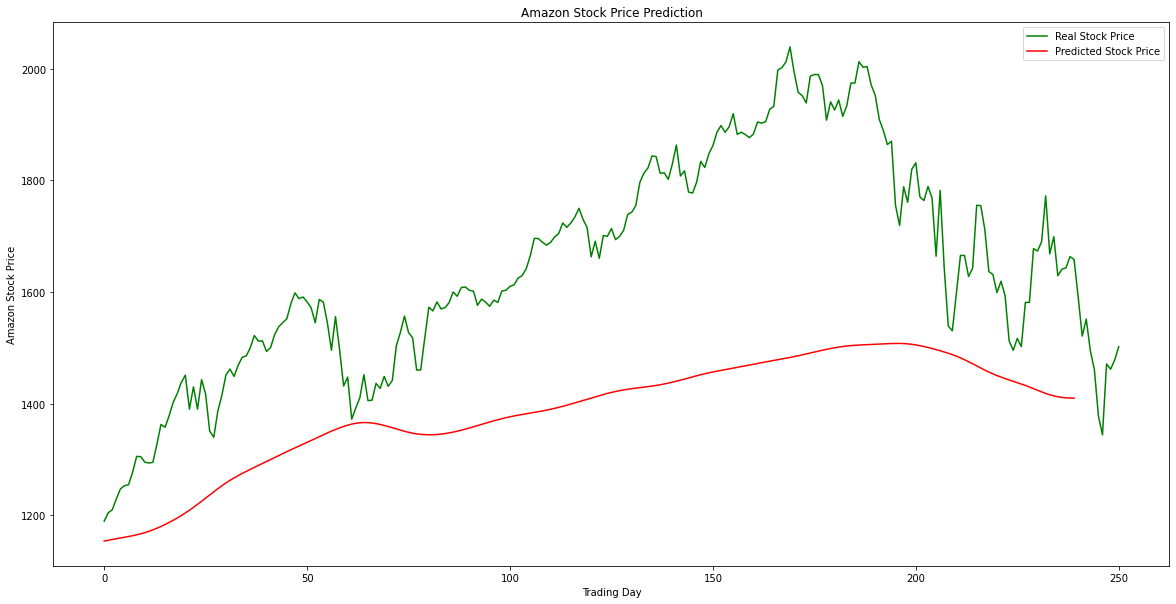

In [13]:
#Plotting
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Real Stock Price')
plt.plot(prediction, color = 'red', label = 'Predicted Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()